# Representation Learning
The success of machine learning algorithms depends a lot on data representation. Representation learning has recently emerged as an alternative approach to feature extraction. In representation learning, features are extracted from unlabeled data by training a neural network on a secondary, supervised learning task. In this lab, we will apply representation learning techniques to textual and graph-structured data. The code that you will write make use of the Gensim and NetworkX libraries of Python.

## Part 1: Learning word representations
In the first part of the lab, we will use the [Word2Vec](http://www.cs.columbia.edu/~blei/seminar/2016_discrete_data/readings/MikolovSutskeverChenCorradoDean2013.pdf) model to learn high-quality word representations that capture several syntactic and semantic word relationship.

Throughout the entire session, we will be working with a subpart of the [OpinRank](http://kavita-ganesan.com/entity-ranking-data/) dataset. The OpinRank dataset contains reviews of cars and hotels. We will focus only on the hotel reviews. These reviews are stored in the `reviews_data.txt.gz` file. Each line in this file corresponds to a hotel review. Use the `load_data()` function defined below to read the data.

In [1]:
import gzip

def load_data():
    data = list()
    with gzip.open ('data/reviews_data.txt.gz', 'rb') as f:
        for line in f:
            data.append(line.decode('utf-8', 'backslashreplace'))
    return data

data = load_data()

The `load_data()` function returns a list that contains all the hotel reviews. Print the second review of the dataset.

In [2]:
print("Example of a review:", data[1])

Example of a review: Sep 25 2009 	Great Budget Hotel!	Stayed two nights at Aloft on the most recent trip to China. The hotel was very modern and clean. The room was spotless and a comfortable king sized bed (as far as soft beds go in China). The staff was very punctual and went out of the way to help my every need, including going to a store across the street to purchase a China Mobile SIM card for me. The buffet breakfast was okay, nothing to write home about. The 42\x94 LCD screen had movies on demand for 20RMB and had a good selection of western channels including HBO, CNN, BBC, Star World etc\x85 The gym was small, had a selection of basic weights and one cable machine, there was however 6 new TechnoGym cardio machines with built in LCD TVs which were very good. The location is a bit out of the way to the central areas of Beijing, but it is better suited for my needs as I need to be in the Haidian district. Being SPG Platinum there were no upgrades to a better room, because Aloft h

The documents that are contained in the dataset have already undergone some preprocessing. Therefore, we will only remove some punctuation marks, diacritics, and non letters, if any. Note that the input to the Word2Vec model has to be a list of lists (a list of sentences/documents where each sentence/document is a list of tokens). Therefore, we will also represent each document as a list of tokens. Use the `clean_str()` function defined below to preprocess each hotel review. Then, print the second preprocessed review.

In [3]:
import re

def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    return string.strip().split()


for i in range(len(data)):
    data[i] = clean_str(data[i])

print("Example of preprocessed review:", data[1])

Example of preprocessed review: ['Sep', '25', '2009', 'Great', 'Budget', 'Hotel', '!', 'Stayed', 'two', 'nights', 'at', 'Aloft', 'on', 'the', 'most', 'recent', 'trip', 'to', 'China', 'The', 'hotel', 'was', 'very', 'modern', 'and', 'clean', 'The', 'room', 'was', 'spotless', 'and', 'a', 'comfortable', 'king', 'sized', 'bed', '\\(', 'as', 'far', 'as', 'soft', 'beds', 'go', 'in', 'China', '\\)', 'The', 'staff', 'was', 'very', 'punctual', 'and', 'went', 'out', 'of', 'the', 'way', 'to', 'help', 'my', 'every', 'need', ',', 'including', 'going', 'to', 'a', 'store', 'across', 'the', 'street', 'to', 'purchase', 'a', 'China', 'Mobile', 'SIM', 'card', 'for', 'me', 'The', 'buffet', 'breakfast', 'was', 'okay', ',', 'nothing', 'to', 'write', 'home', 'about', 'The', '42', 'x94', 'LCD', 'screen', 'had', 'movies', 'on', 'demand', 'for', '20RMB', 'and', 'had', 'a', 'good', 'selection', 'of', 'western', 'channels', 'including', 'HBO', ',', 'CNN', ',', 'BBC', ',', 'Star', 'World', 'etc', 'x85', 'The', 'gym

We will next train the CBOW model. Training of the CBOW model is very efficient since it does not involve any dense matrix multiplications. We will use Gensim's implementation of Word2Vec. We first need to initialize the Skipgram model (e.g., a [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) object. The general syntax for initializing the model is the following:

```
model = Word2Vec(size=300, window=5, min_count=4, sg=1, workers=8)
```

where `size` corresponds to the dimensionality of the word embeddings, `window` is the maximum distance between the target word and its neighboring word within a sentence, `min_count` corresponds to the minimium frequency count of words, `sg` determines the type of the model (i.e., Skipgram or CBOW) and `workers` determines the number of CPU threads to use to train the model. Initialize a Word2Vec object and set the dimensionality of the word vectors equal to 100, the size of the window to 20, ignore all words with total frequency lower than 2, use the Skipgram model, and set the number of workers equal to the number of threads of your machine. Then, use the [build_vocab()](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec.build_vocab) function of the Word2Vec object to build the vocabulary. This function takes as input a sequence of documents (e.g., list of lists) and extracts the vocabulary of the corpus.

In [4]:
from gensim.models import Word2Vec

model = Word2Vec(size=100, window=20, min_count=2, sg=0, workers=8)
model.build_vocab(data) 

After extracting the vocabulary, we can use the [train()](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec.train) function of the Word2Vec object to start training the model. The general syntax of the function is the following:

```
model.train(input_data, total_examples=model.corpus_count, epochs=3) 
```

where `input_data` is the list of input documents, `total_examples` is the number of input documents, and `epochs` is the number of iterations over the input data. Use the `train()` function to train the model. Set the number of epochs to 5. Training time depends on the hardware of your machine. Note that it can take up to 10 minutes.

In [5]:
model.train(data, total_examples=model.corpus_count, epochs=5) 

(174904175, 238004055)

Next, we will experiment with the word embeddings learned by our model. First, we will get familiar with some interesting properties of word embeddings by performing some operations manually. The [most_similar()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar) function returns the 10 terms that are most similar to a given word. The general syntax of the function is the following:

```
model.wv.most_similar(positive=input_word) 
```
 
Use the function to find the words that are similar to the word “France”.

In [6]:
print(model.wv.most_similar(positive='France'))

[('Africa', 0.7646529078483582), ('Canada', 0.7586967349052429), ('Germany', 0.7575407028198242), ('Austria', 0.7568956017494202), ('Spain', 0.7407647371292114), ('Ireland', 0.7200484275817871), ('England', 0.6991022825241089), ('Greece', 0.6922909617424011), ('Philadelphia', 0.6864249110221863), ('States', 0.6813121438026428)]


You can specify the number of similar words to be retrieved by setting the `topn` parameter of the `most_similar()` function to some value. Use the function to retrieve the 20 words that are most similar to the word “football”.

In [7]:
print(model.wv.most_similar(positive='football', topn=20))

[('soccer', 0.8277610540390015), ('game', 0.7676321268081665), ('band', 0.7571816444396973), ('NFL', 0.7357125878334045), ('hockey', 0.7276694774627686), ('singer', 0.7263323068618774), ('baseball', 0.7129195928573608), ('basketball', 0.7113858461380005), ('games', 0.7112579345703125), ('Football', 0.706443727016449), ('cricket', 0.70280522108078), ('bands', 0.6989003419876099), ('tournament', 0.6984753608703613), ('sport', 0.6982118487358093), ('rugby', 0.6975573301315308), ('playing', 0.6975222826004028), ('sports', 0.6959559917449951), ('footie', 0.6958882212638855), ('premiership', 0.6950870752334595), ('play', 0.6804399490356445)]


Next, we will compute the similarity between terms. To calculate the similarity between two words, you can use the [similarity()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.similarity) function which takes two words as input and computes their cosine similarity. The general syntax of the function is shown below:

```
model.wv.similarity(w1=input_word1, w2=input_word2)
```
 
Use the function to calculate the similarity between the words “dog” and “cat”.

In [8]:
print(model.wv.similarity(w1='dog', w2='cat'))

0.35117006


Use the same function to compute the similarity between the words “rugby” and “man”, and the words “rugby” and “woman”. What do you observe?

In [9]:
print(model.wv.similarity(w1='rugby', w2='man'))
print(model.wv.similarity(w1='rugby', w2='woman'))

0.120419025
0.09688865


From the above, it is clear that the word representations learned by neural networks are very interesting because the generated vectors explicitly encode many linguistic regularities and patterns. Many of these patterns can be represented as linear translations. You can find the terms that are most similar to such linear translations using the [most_similar()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar) function. Use the function to obtain the 5 words that are most similar to the result of the following vector operation: “king” - “man” + “woman”. What do you observe?

In [10]:
print(model.wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=5))

[('queen', 0.8277692794799805), ('twin', 0.7322973012924194), ('King', 0.7222651839256287), ('double', 0.6975022554397583), ('Queen', 0.6739786267280579)]


Next, we will project the 200 most frequent words of our dataset into the two-dimensional space, and we will visualize them. The 200 most frequent words, correspond to the first 200 elements of the [index2entity](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.index2entity) list. Given a term, you can obtain its representation as follows:

```
vec = model.wv[word]
```

Store the representations of the 200 most frequent terms in a 200 $\times$ 100 matrix, and then use PCA/t-SNE to reduce their dimensionality. Then, visualize the terms in the two-dimensional space. 

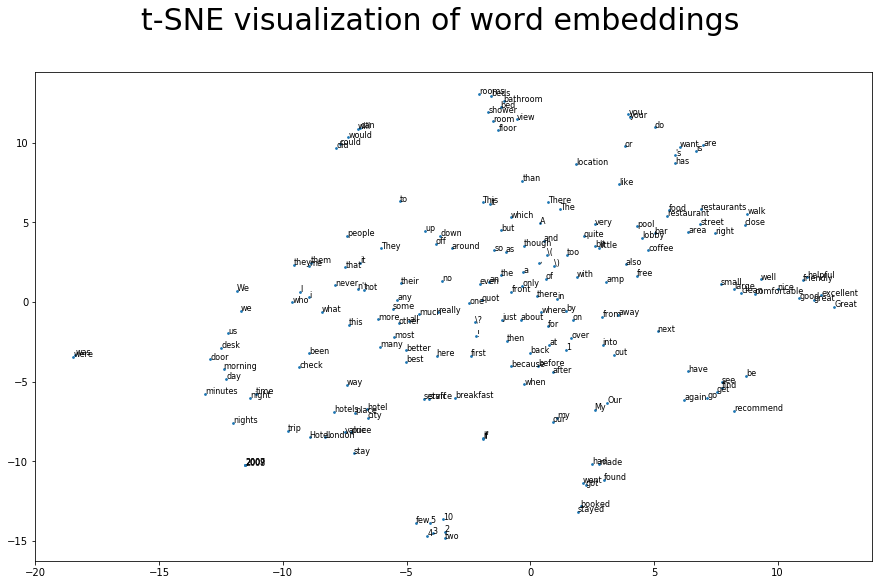

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline


n = 200
words = model.wv.index2entity[:n]

vecs = np.empty(shape=(n, 100))
for idx,word in enumerate(words):
    vecs[idx,:] = model.wv[word]

my_pca = PCA(n_components=10)
my_tsne = TSNE(n_components=2)

vecs_pca = my_pca.fit_transform(vecs)
vecs_tsne = my_tsne.fit_transform(vecs_pca)

fig, ax = plt.subplots()
ax.scatter(vecs_tsne[:,0], vecs_tsne[:,1],s=3)
for x, y, token in zip(vecs_tsne[:,0] , vecs_tsne[:,1], words):     
    ax.annotate(token, xy=(x, y), size=8)
fig.suptitle('t-SNE visualization of word embeddings',fontsize=30)
fig.set_size_inches(15,9)

## Part 2: Learning node representations
In recent years, representation learning on graphs has attracted increasing attention. The idea behind the representation learning approaches is to learn a mapping that embeds nodes as points in a low-dimensional vector space such that these representations reflect the structure of the graph. In this part of the lab, we will generate embeddings for the nodes of a graph using DeepWalk, a method that is inspired by recent advances in natural language processing.

Our dataset is a movie/actor network. This is a bipartite graph that consists of movies and of the actors that have played in them. More specifically, the nodes of the graph represent movies and actors, and there is an edge between a movie and an actor if the actor has played in that movie. The graph is stored in the `movies_actors_edgelist.txt` file as an edge list:

```
Toy Story (1995)	Tim Allen
Toy Story (1995)	Tom Hanks
Toy Story (1995)	Jim Varney
Toy Story (1995)	Don Rickles
Jumanji (1995)	Kirsten Dunst
Jumanji (1995)	Jonathan Hyde
Jumanji (1995)	Bradley Pierce
Jumanji (1995)	Robin Williams
Grumpier Old Men (1995)	Jack Lemmon
.
.
.
```

The network contains 14,612 nodes, 21,395 edges. Load the network data into an graph G, using the [read_edgelist()](https://networkx.github.io/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html) function of NetworkX. The general syntax of the function is the following:

```
G = nx.read_edgelist(path_to_file, comments='#', delimiter=None)
```

Note that, the delimeter used to separate values is the tab character '\t'.

In [12]:
import networkx as nx

G = nx.read_edgelist('data/movies_actors_edgelist.txt', delimiter='\t')

Print the number of nodes and the number of the edges of the dataset (use the [`number_of_nodes()`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.number_of_nodes.html#networkx.DiGraph.number_of_nodes) and [`number_of_edges()`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.number_of_edges.html#networkx.DiGraph.number_of_edges) functions of NetworkX).

In [13]:
print(G.number_of_nodes())
print(G.number_of_edges())

14612
21395


We will next implement [DeepWalk](http://www.perozzi.net/publications/14_kdd_deepwalk.pdf), an algorithm for generating node embeddings. DeepWalk builds on recent advances in unsupervised feature learning which have proven very successful in natural language processing. DeepWalk learns representations of a graph's vertices by running short random walks. These representations capture neighborhood similarity and community membership. The employed model is analogous to Skipgram:  given a vertex $v_i$, it estimates the likelihood of observing the previous and the following vertices visited in the random walk. Specifically, DeepWalk solves the following optimization problem:

$$
minimize_{\phi} \quad -\log \prod_{\substack{j=i-w \\ j \neq i}}^{i+w} P( v_j | \phi(v_i))
$$

where $\phi: V \rightarrow \mathbb{R}^d$ is a function that maps vertices to their embeddings, and $w$ is the size of the sliding window. Hence, given the embedding of a vertex, DeepWalk maximizes the probability of its neighbors in the walk.

Given a graph $G=(V,E)$ and a starting vertex $v_i$, a random walk of length $t$ is a stochastic process with random variables $w_{v_i}^{(1)}, w_{v_i}^{(2)},\ldots,w_{v_i}^{(t)}$ such that $w_{v_i}^{(1)} = v_i$ and $w_{v_i}^{(j)}$ is a a vertex chosen uniformly at random from the neighbors of vertex $w_{v_i}^{(j-1)}$. In other words, a random walk is a sequence of vertices: we first select a neighbor of $v_i$ at random, and move to this neighbor. Then, we select a neighbor of this new vertex at random, and move to it, etc.

Next, we will implement a function that given a graph and a starting vertex performs a random walk of specific length, and returns a list of the visited vertices. Fill in the body of the function `random_walk()`. Note that G is a NexworkX graph. You can use the [neighbors()](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html) function of NetworkX to get the neighbors of a vertex $v$.

In [14]:
from random import randint

def random_walk(G, node, walk_length):
    # Starts from vertex "node" and performs a random walk of length "walk length". Returns a list of the visited vertices
    walk = [node]
    for i in range(walk_length):
        neighbors =  list(G.neighbors(walk[i]))
        walk.append(neighbors[randint(0,len(neighbors)-1)])

    walk = [str(node) for node in walk]
    return walk

Next, you will implement a function that given a graph, it runs a number of random walks from each node of the graph, and returns a list of all random walks. Fill in the body of the function `generate_walks()`. Note that the function [nodes()](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.nodes.html) of NetworkX returns a list containing all the nodes of graph G.

In [15]:
import numpy as np

def generate_walks(graph, num_walks, walk_length):
    # Runs "num_walks" random walks from each node, and returns a list of all random walk
    walks = []
    for i in range(num_walks):
        nodes = graph.nodes()
        nodes = np.random.permutation(nodes)
        for j in range(nodes.shape[0]):
            walk = random_walk(graph, nodes[j], walk_length)
            walks.append(walk)

    return walks

After implementing the two functions, use the `generate_walks()` function to extract sequences of random walks from the graph. Start 10 walks from each node and set the length of the walks equal to 20.

In [16]:
walks = generate_walks(G, 10, 20)

Now, we can treat the generated walks as the equivalent of sentences and use the Gensim library to learn representations of the nodes of the movie/actor graph. To generate the embeddings, initialize a [Word2Vec](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) object and use its [build_vocab()](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec.build_vocab) function to build the vocabulary. Set the dimensionality of the word vectors equal to 100, the size of the window to 5, use the Skipgram model, and set the number of workers equal to the number of threads of your machine. Then, use the [train()](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec.train) function of the Word2Vec object to compute the node embeddings. Set the number of epochs to 5.

In [17]:
model = Word2Vec(size=100, window=5, min_count=0, sg=1, workers=8)
model.build_vocab(walks)
model.train(walks, total_examples=model.corpus_count, epochs=10) 

(30685200, 30685200)

Use the [most_similar()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar) function to obtain the 10 nodes that are most similar to the node “Keanu Reeves”. 

In [18]:
print(model.wv.most_similar(positive='Keanu Reeves', topn=10))

[("Bill & Ted's Excellent Adventure (1989)", 0.8350274562835693), ('Carrie-Ann Moss', 0.796052098274231), ('Terry Camilleri', 0.7957956790924072), ('Alex Winter', 0.7747663259506226), ('Matrix Reloaded, The (2003)', 0.7710589170455933), ('Little Buddha (1993)', 0.7653455138206482), ('Permanent Record (1988)', 0.7636618614196777), ('My Own Private Idaho (1991)', 0.7559158205986023), ('Matrix Revolutions, The (2003)', 0.7503856420516968), ("Devil's Advocate, The (1997)", 0.7492908239364624)]


Use once again the [most_similar()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar) function to obtain the 5 nodes that are most similar to the result of the following vector operation: “Eyes Wide Shut (1999)” - “Tom Cruise” + “Jack Nicholson”. What do you observe?

In [19]:
print(model.wv.most_similar (positive=['Jack Nicholson', 'Eyes Wide Shut (1999)'], negative=['Tom Cruise'], topn=10))

[('Fannie Flagg', 0.7181995511054993), ("One Flew Over the Cuckoo's Nest (1975)", 0.6956214308738708), ('Michael Berryman', 0.6917641758918762), ('Five Easy Pieces (1970)', 0.6881928443908691), ('William Redfield', 0.684726357460022), ('John Colicos', 0.6733496785163879), ('Ironweed (1987)', 0.6699619293212891), ('Border, The (1982)', 0.6657074093818665), ('John Huston', 0.6478091478347778), ('Danny Lloyd', 0.6421249508857727)]
